# Retificador de meia onda (Carga R)

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Tensão na carga - # 
Vpk:	 311.1269837220809 
Vm: 	 99.03479477728168 
Vrms: 	 155.5634918610405
# - Corrente na carga - # 
Ipk: 	 77.78136055333901 
Im: 	 24.75869869432042 
Irms: 	 38.89087296526012
# - Potências - # 
Ppk:	 24199.760198114087 
P: 	 6050.000000000003 
S: 	 8555.992052357227
# - Fatores - # 
FP:	 0.7071067811865477 
THD V:	 1.000001075992332 
THD I:	 1.000001075992332


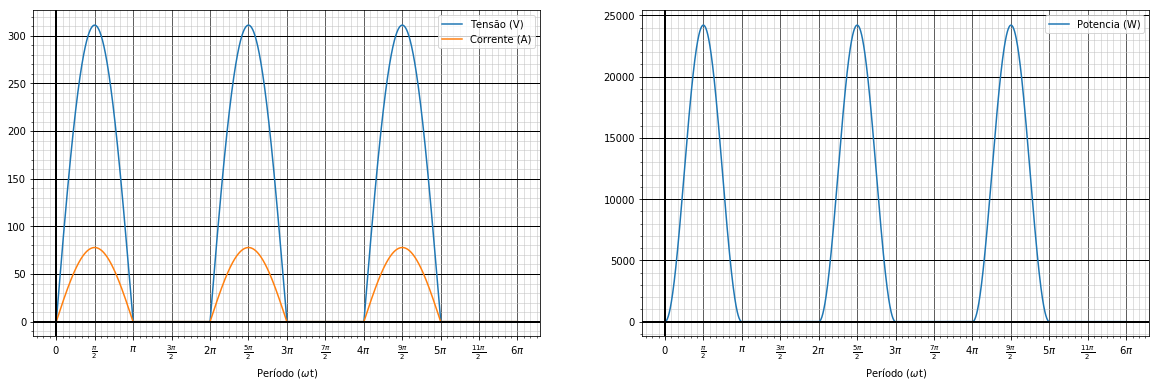

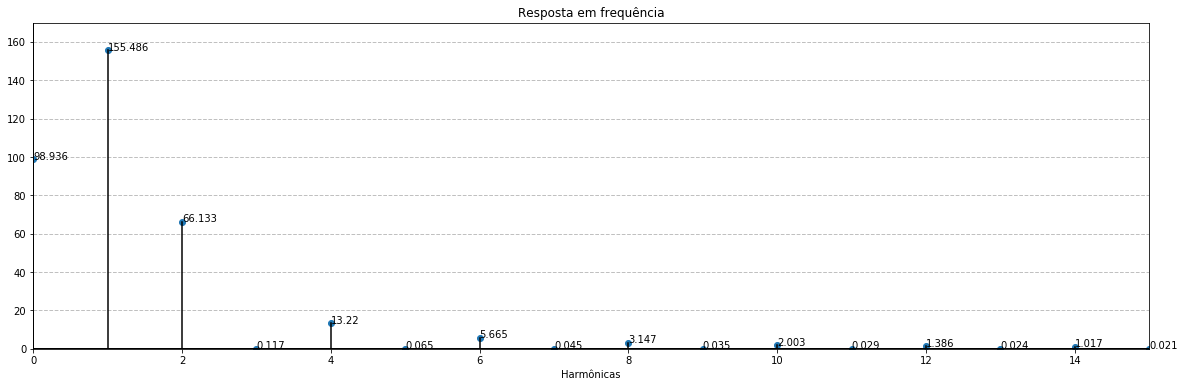

In [2]:
############# RETIFICADOR MEIA ONDA #############
#################### CARGA R ####################

V_pk = 220*sqrt(2)
R = 4

T = 2*pi
a = 0
b = pi

func_v = f'{V_pk}*sin(x)*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i = '(' + func_v + f')/{R}'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)